<big><big><big>Лабораторная работа №4. Анализ данных в линейной регрессионной модели</big></big></big>

**Подключение необходимых библиотек.**

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import statistics as stat
import math
import pandas as pd
import scipy.stats as st
import sympy as sp

In [2]:
X = list(map(float, """9.76 6.2 11.96 14.91 5.37 5.56 10.31 13.85 17.05 12.97 12.32 9.15 14.14 12.56 14.43 7.89 5.95 11.08 13.65 9.88 15.02 9.3 
14.72 3.82 17.98 7.03 8.24 15.26 9.43 13.25 9.39 2.9 9.01 6.01 7.38 4.95 
7.34 13.58 8.78 7.1 13.73 14.48 7.28 7.95 7.85 14.96 7.04 6.16 8.21 13.13""".split()))

Y = list(map(float, """5.53 2.03 8.04 13.69 3.58 -0.60 5.58 7.53 11.05 6.66 5.85 4.4 8.27 9.35 8.42 4.55 0.75 6.91 6.88 5.49 9.87 6.44 11.01 1.39 10.77 1.58 4.98 11.05
2.56 10.54 1.86 0.62 6.45 2.47 3.08 -0.85 9.95 9.15 5.68 3.89 12.01 10.79 
2.57 1.3 7.81 8.66 5.57 0.87 4.79 5.99""".split()))

n = len(X)

**Построение диаграммы рассеивания**

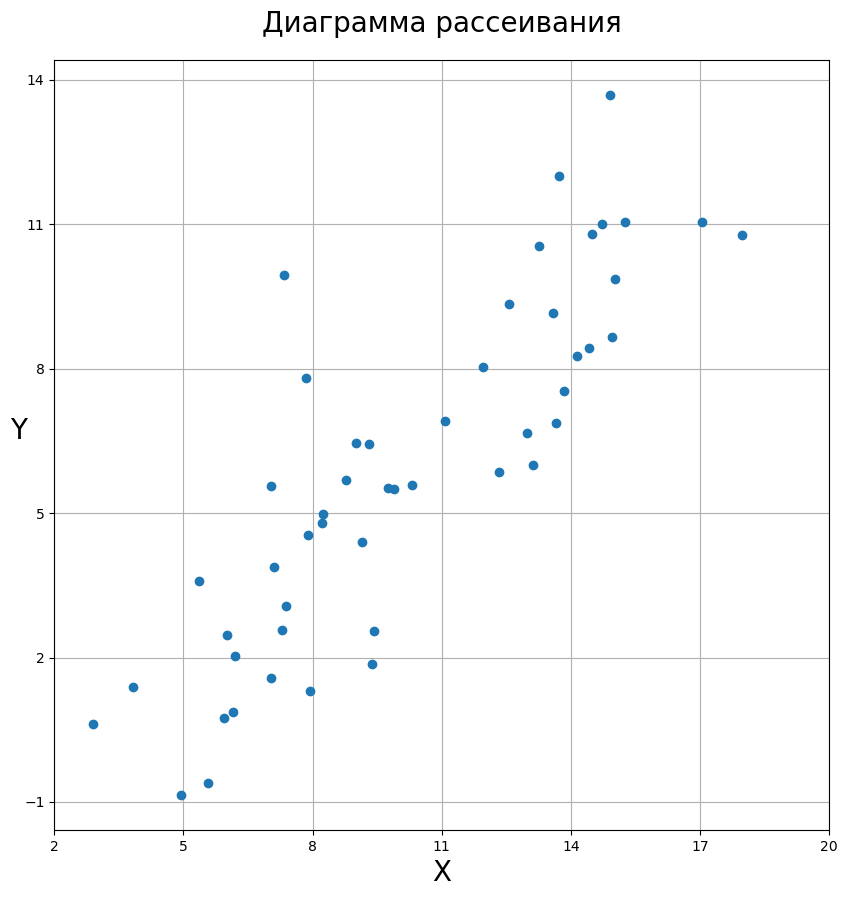

In [3]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

plt.plot(X, Y, "o")

h = 3
x_coords = list(range(math.floor(min(X)), math.ceil(max(X))+h, h))
y_coords = list(range(math.floor(min(Y)), math.ceil(max(Y))+h, h))

# параметры координатной плоскости
ax.set_xlabel("X", fontdict={"fontsize": 20})
ax.set_ylabel("Y", fontdict={"fontsize": 20}, rotation=0)
plt.title("Диаграмма рассеивания", fontdict={"fontsize": 20}, pad=20)
plt.grid()

plt.xticks(x_coords)
plt.yticks(y_coords)

plt.show()

**Произведём группировку данных, используя графическую группировку (с помощью нанесённой на диаграмму рассеивания сетки)**

*Найдем середины разбиения*

In [4]:
xi = []
yi = []

for i in range(1, len(x_coords)):
    xi.append((x_coords[i - 1] + x_coords[i]) / 2)
for i in range(1, len(y_coords)):
    yi.append((y_coords[i - 1] + y_coords[i]) / 2)

print(xi)
print(yi)

[3.5, 6.5, 9.5, 12.5, 15.5, 18.5]
[0.5, 3.5, 6.5, 9.5, 12.5]


In [5]:
table = np.zeros((len(x_coords) - 1, len(y_coords) - 1))

for x, y in zip(X, Y):
    for i in range(1, len(x_coords)):
        if x_coords[i - 1] <= x < x_coords[i]:
            break
    for j in range(1, len(y_coords)):
        if y_coords[j - 1] <= y < y_coords[j]:
            break
    table[i - 1, j - 1] += 1

df = pd.DataFrame(table).astype(int)

df.columns = yi
df.columns.name = 'X\Y'
df.index = xi
df

X\Y,0.5,3.5,6.5,9.5,12.5
3.5,3,0,0,0,0
6.5,5,7,2,1,0
9.5,1,4,6,0,0
12.5,0,0,6,4,1
15.5,0,0,0,5,3
18.5,0,0,0,1,1


*Найдём ni - суммы по строкам*

In [6]:
ni = list(df.sum(axis=1))
print(ni)

[3, 15, 11, 11, 8, 2]


*Найдём nj - суммы по столбцам*

In [7]:
nj = list(df.sum(axis=0))
print(nj)

[9, 11, 14, 11, 5]


**Оценка числовых характеристик для негруппированных данных**

 <big>$ \overline {x} $ = $ \frac {1}{n} $ $ \sum _ {m=1}^ {n} $ $ x_ {m} $ </big>


<big>$ \overline {y} $ = $ \frac {1}{n} $ $ \sum _ {m=1}^ {n} $ $ y_ {m} $</big>

<big> $ s_ {X}^ {2} $ = $ \frac {1}{n-1} $ $ \sum _ {m=1}^ {n} $ $ (x_ {m}-\overline {x})^ {2} $ </big>

<big>$ s_ {Y}^ {2} $ = $ \frac {1}{n-1} $ $ \sum _ {m=1}^ {n} $ $ (y_ {m}-\overline {y})^ {2} $ </big>

<big>$\overline K_{X,Y}=$ $ \frac {1}{n-1} $ $ \sum _ {m=1}^ {n} $ ( $ x_ {m} $ - $ \overline {x} $ )( $ y_ {m} $ - $ \overline {y} $ )= $ \frac {1}{n-1} $ ( $ \sum _ {m=1}^ {n} $ $ x_ {m} $ $ y_ {m} $  $ -n\overline {x} $ $ \overline {y} )$</big>

<big> $\overline \rho  _{X,Y}=  \frac {K_{X,Y}}{s_x s_y} $</big>

In [8]:
mx = 1 / n * sum(X)
my = 1 / n * sum(Y)

sx = np.sqrt(1 / (n - 1) * sum([(x - mx) ** 2 for x in X]))
sy = np.sqrt(1 / (n - 1) * sum([(y - my) ** 2 for y in Y]))

kxy = 1 / (n - 1) * sum([(X[i] - mx) * (Y[i] - my) for i in range(n)])

rxy = kxy / (sx * sy)

print("Выборочная средняя для X:", mx)
print("Выборочная средняя для Y:", my)
print("Исправленная дисперсия для X:", sx)
print("Исправленная дисперсия для Y:", sy)
print("Ковариация:", kxy)
print("Выборочный коэффициент корреляции:", rxy)

Выборочная средняя для X: 10.2054
Выборочная средняя для Y: 5.9362
Исправленная дисперсия для X: 3.7284960090894455
Исправленная дисперсия для Y: 3.646643348928671
Ковариация: 11.558845428571423
Выборочный коэффициент корреляции: 0.8501341913083519


**Оценка числовых характеристик для группированных данных**

<big>$ \overline {x} $ = $ \frac {1}{n} $ $ \sum _ {i=1}^ {k} $ $ x_ {i} $ $ n_ {i} $</big>

<big>$ \overline {y} $ = $ \frac {1}{n} $ $ \sum _ {j=1}^ {l} $ $ y_ {j} $ $ n_ {j} $</big>

<big>$ s_ {X}^ {2} $ = $ \frac {1}{n-1} $ $ \sum _ {i=1}^ {k} $ $ (x_ {i}-\overline {x})^ {2} $ $ n_ {i} $</big>

<big>$ s_ {Y}^ {2} $ = $ \frac {1}{n-1} $ $ \sum _ {j=1}^ {l} $ $ (y_ {j}-\overline {y})^ {2} n_j$</big>

<big>$ \overline { K}_{X,Y}=  \frac {1}{n-1}  \sum_ {i=1}^ {k}  \sum _ {j=1}^ {l}  (  x_ {i}  -  \overline {x}  )  (y_{j}  - \overline {y} $ ) $ n_ {ij} $</big>

<big> $\overline \rho  _{X,Y}=  \frac {K_{X,Y}}{s_x s_y} $</big>

In [9]:
mx_group = 1 / n * sum([xi[i] * ni[i] for i in range(len(ni))])
my_group = 1 / n * sum([yi[j] * nj[j] for j in range(len(nj))])

sx_group = np.sqrt(1 / (n - 1) * sum([ni[i] * (xi[i] - mx_group) ** 2 for i in range(len(xi))]))
sy_group = np.sqrt(1 / (n - 1) * sum([nj[i] * (yi[i] - my_group) ** 2 for i in range(len(yi))]))

kxy_group = 0
for i in range(len(xi)):
    for j in range(len(yi)):
        kxy_group += 1 / (n + 1) * (xi[i] - mx_group) * (yi[j] - my_group) * table[i][j]


rxy_group = kxy_group / (sx_group * sy_group)

print("Выборочная средняя для X:", mx_group)
print("Выборочная средняя для Y:", my_group)
print("Исправленная дисперсия для X:", sx_group)
print("Исправленная дисперсия для Y:", sy_group)
print("Ковариация:", kxy_group)
print("Выборочный коэффициент корреляции:", rxy_group)

Выборочная средняя для X: 10.22
Выборочная средняя для Y: 6.0200000000000005
Исправленная дисперсия для X: 3.954021461029987
Исправленная дисперсия для Y: 3.7538551612214035
Ковариация: 11.809411764705883
Выборочный коэффициент корреляции: 0.7956310651449993


**Для негруппированных данных проверить гипотезу : <big>$H_0 : \rho_{X,Y} = 0$</big> об отсутствии линейной статистической связи между компонентами X и Y при альтернативной гипотезе <big>$H_1 : \rho_{X,Y} \neq 0$</big> (уровень значимости <big>$\alpha = 0.05$</big> );**

In [10]:
alpha = 0.05

*Найдём квантиль распределения Стьюдента*

<big>$  t_ {1-\frac {\alpha }{2}(n-2)}$</big>

In [11]:
print(st.t.ppf(1 - alpha / 2, n - 2))

2.0106347546964454


*Найдём статистику Z*

<big>$ Z = \frac{\overline\rho_{X, Y} \sqrt{n-2}}{\sqrt{1-\overline\rho_{X,Y}^2}}$</big>

In [12]:
print((rxy * np.sqrt(n - 2)) / np.sqrt(1 - rxy**2))

11.185494964367876


*<big>$|z|>t_ {1- 0.975 }(48)$</big>, значит,гипотеза <big>$H_0$</big> отклоняется в пользу гипотезы <big>$H_1$</big>. Корреляция значима*

**Для негруппированных данных получить интервальную оценку для истинного значения коэффициента корреляции <big>$\overline \rho  _{X,Y}$</big> при уровне значимости <big>$\alpha = 0.05$</big>**

*Найдем доверительный интервал для коэффициента корреляции*

<big> $ th(\frac {1}{2} $ $ \ln $ $ \frac {1+\overline {\rho }}{1-\overline \rho } $ - $ \frac {u_{1-\alpha /2}}{\sqrt {n-3}} $ - $ \frac {\overline \rho }{2(n-1)}) $ < $ \rho $ < $ th(\frac {1}{2} $ $ \ln $ $ \frac {1+\overline {\rho }}{1-\overline \rho } $ + $ \frac {u_{1-\alpha /2}}{\sqrt {n-3}} $ - $ \frac {\overline \rho }{2(n-1)}) $ </big>

In [13]:
def findInterval(alpha, rxy):
    temp1 = 1 / 2 * np.log((1 + rxy) / (1 - rxy))
    temp2 = st.norm.ppf(1 - alpha / 2) / np.sqrt(n - 3) - rxy / (2 * (n - 1))
    return [np.tanh(temp1 - temp2), np.tanh(temp1 + temp2)]

In [14]:
print(findInterval(alpha, rxy))

[0.7528152777154387, 0.9110814471107023]


**Для негруппированных и группированных данных составить уравнения линейной регрессии Y на x и X на y**

<big> $y(x)= \overline {y} $ + $ \overline {\rho}_{X,Y} $  $ \frac {s_ {Y}}{s_ {x}} $ ( $x - \overline {x} $ )</big>

<big> $x(y)=  \overline {x} $ + $ \overline {\rho}_{X,Y} $  $ \frac {s_X}{s_ {Y}} $ ($y-  \overline {y} $ )</big>

*Для негруппированных данных*

In [15]:
x, y  = sp.symbols('x, y')

y_regr = my + rxy * sy/sx * (x-mx)
x_regr = mx + rxy * sx/sy * (y-my)

print(y_regr)
print(x_regr)

0.831470970298438*x - 2.54929384028368
0.869216327507018*y + 5.04555803665284


*Выполним проверку $\sqrt{\overline a \overline a`} = |\overline {\rho}_{X,Y}|$*

In [41]:
sp.sqrt(y_regr.as_coefficients_dict()[x] * x_regr.as_coefficients_dict()[y])

0.850134191308352

In [42]:
rxy

0.8501341913083519

*Для группированных данных*

In [18]:
y_regr_group = my_group + rxy_group * sy_group/sx_group * (x-mx_group)
x_regr_group = mx_group + rxy_group * sx_group/sy_group * (y-my_group)

print(y_regr_group)
print(x_regr_group)

0.755353457172343*x - 1.69971233230134
0.838056390439388*y + 5.17490052955489


*Выполним проверку $\sqrt{\overline a \overline a`} = |\overline {\rho}_{X,Y}|$*

In [19]:
sp.sqrt(y_regr_group.as_coefficients_dict()[x] * x_regr_group.as_coefficients_dict()[y])

0.795631065144999

In [20]:
rxy_group

0.7956310651449993

**Для негруппированных данных нанести графики выборочных регрессионных прямых на диаграмму рассеивания**

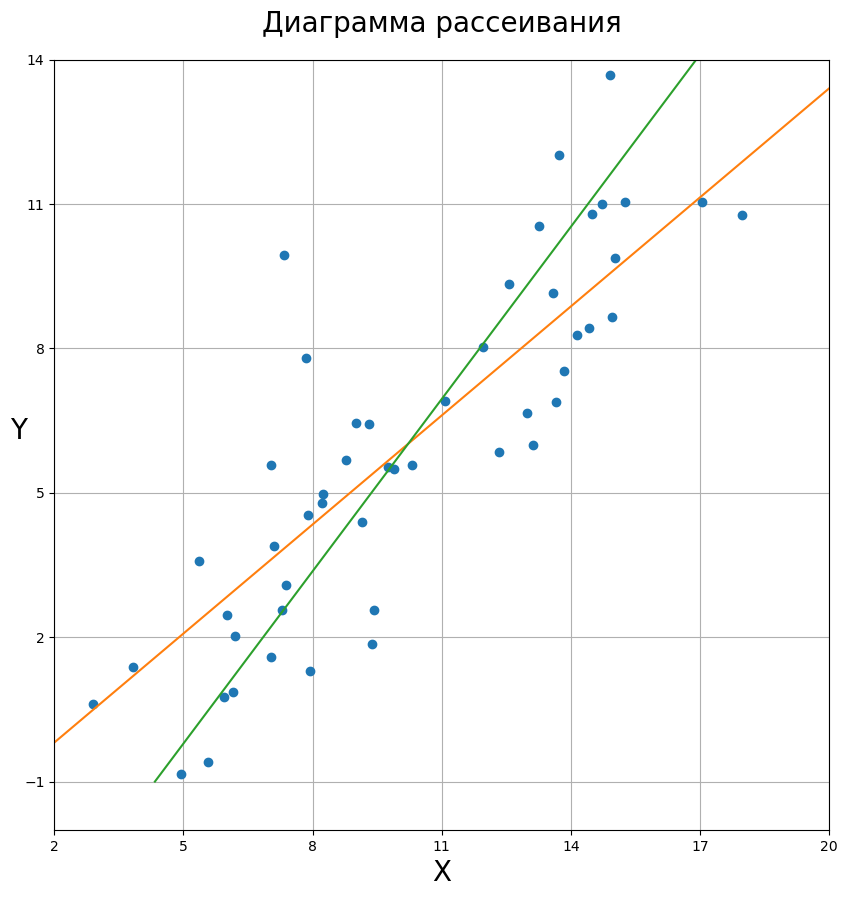

In [40]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

plt.plot(X, Y, "o")

h = 3
x_coords = list(range(math.floor(min(X)), math.ceil(max(X)) + h, h))
y_coords = list(range(math.floor(min(Y)), math.ceil(max(Y)) + h, h))


x_plot = np.linspace(2, 20, 10)
y_plot = 0.755353457172343 * x_plot - 1.69971233230134
plt.plot(x_plot, y_plot)


y_plot = np.linspace(-1, 14, 10)
x_plot = 0.838056390439388 * y_plot + 5.17490052955489
plt.plot(x_plot, y_plot)

# параметры координатной плоскости
ax.set_xlabel("X", fontdict={"fontsize": 20})
ax.set_ylabel("Y", fontdict={"fontsize": 20}, rotation=0)
plt.title("Диаграмма рассеивания", fontdict={"fontsize": 20}, pad=20)
plt.grid()

ax.set_xlim([2, 18])
ax.set_ylim([-2, 14])

plt.xticks(x_coords)
plt.yticks(y_coords)

plt.show()

**Для негруппированных данных по найденным оценкам параметров линейной регрессии Y на x получить оценку $s^2$ для дисперсии ошибок наблюдений $\sigma^2$ , найти коэффициент детерминации $R^2$ , построить доверительные интервалы для параметров регрессии a и b, дисперсии ошибок наблюдений $\sigma^2$ и среднего значения Y при $x=x_0$**

<big> $ Q_ {y} $ = $ \sum _ {i=1}^ {n} $ $ (y_ {i}-\overline {y})^ {2} $ </big>

<big> $ Q_ {R} $ =  $ \frac {(n-1)K_ {X}^ {2}}{s^ {2}x} $</big>

In [22]:
qy = sum([(y - my) ** 2 for y in Y])
qr = ((n - 1) * kxy**2) / sx**2
print("Qу:", qy)
print("Qr:", qr)

Qу: 651.6023779999999
Qr: 470.9313767771734


<big> $ Q_ {E} = Q_ {y}-Q_ {R}$</big>

In [23]:
qe = qy - qr
print("Qe:", qe)

Qe: 180.67100122282653


<big> $ s^2 = \frac{Q_ {E}}{n-2}$</big>

In [24]:
s_kv = np.sqrt(qe / (n - 2))
print("s:", s_kv)

s: 1.9400977274720517


<big> $ R^2 = \frac{Q_ {R}}{Q_ {y}}$</big>

In [25]:
r_kv = np.sqrt(qr / qy)
print("R:", r_kv)

R: 0.8501341913083518


*Выполним проверку $ |\overline{\rho}_{X,Y}| = R$*

In [26]:
rxy

0.8501341913083519

In [27]:
r_kv

0.8501341913083518

*Найдем доверительный интервал для a*

 <big>  $ \widehat a-  t_{1-\frac{\alpha}{2}} (n-2)   \cdot  \sqrt {\frac {S^ {2}}{(n-1)\cdot S_ {X}^ {2}}}  <a< \widehat a+  t_{1-\frac{\alpha}{2}} (n-2)    \cdot  \sqrt {\frac {S^ {2}}{(n-1)\cdot S_ {X}^ {2}}}$</big> 


In [28]:
def getAInterval(a_s, alpha, n, s, sx):
    temp = st.t.ppf(1 - alpha / 2, n - 2) * np.sqrt(s**2 / ((n - 1) * (sx**2)))
    return [a_s - temp, a_s + temp]

In [29]:
getAInterval(0.831470970298438, alpha, n, s_kv, sx)

[0.6820109387371351, 0.9809310018597408]

*Найдем доверительный интервал для b*

<big> $ \widehat b-  t_ {1-\frac {\alpha }{2}} (n-2) \frac {\sqrt {S^ {2}-\sum _ {x_i^ {2}}}}{n(n-1)\cdot S_ {X}^ {2}}  <b<\widehat b+  t_ {1-\frac {\alpha }{2}} (n-2) \frac {\sqrt {S^ {2}-\sum _ {x_i^ {2}}}}{n(n-1)\cdot S_ {X}^ {2}}  $ </big>

In [30]:
def getBInterval(b_s, alpha, n, s, sx):
    temp = st.t.ppf(1 - alpha / 2, n - 2) * np.sqrt(
        (s**2 * sum([x**2 for x in X])) / (n * (n - 1) * (sx**2)))
    return [b_s - temp, b_s + temp]

In [31]:
getBInterval(-2.54929384028368, alpha, n, s_kv, sx)

[-4.171288737689199, -0.9272989428781604]

*Найдем доверительный интервал для $\sigma^2$*

<big> $ \frac  {(n-2)  \cdot  S^{2}  }{\chi_{1-\frac{\alpha}{2}}^2(n-2)}<  \sigma ^ {2}  <  \frac  {(n-2)  \cdot  S^{2}  }{\chi_{\frac{\alpha}{2}}^2(n-2)} $ </big>

In [32]:
def getDInterval(alpha, s, n):
    temp = (n - 2) * s**2
    return [temp / st.chi2.ppf(1 - alpha / 2, n - 2), temp / st.chi2.ppf(alpha / 2, n - 2)]

In [33]:
getDInterval(alpha, s_kv, n)

[2.61756349977077, 5.8746189234888]

*Найдем доверительный интервал для $Y$*

<big> $ \widehat  y_ {0}  \pm  t_ {1-\frac {\alpha }{2}}(n-2) \cdot \sqrt{s^2 \cdot (\frac{1}{n} + \frac{(x_0 - \overline {x})^2}{(n-1)\cdot s_x^2})}$</big>

In [34]:
def getYInterval(alpha, n, s, mx, sx):
    x, y = sp.symbols("x y")
    temp = st.t.ppf(1 - alpha / 2, n - 2) * sp.sqrt(s**2 * (1 / n + (x - mx) ** 2 / ((n - 1) * sx**2)))
    return [(y - temp), (y + temp)]

In [35]:
getYInterval(alpha, n, s_kv, mx, sx)

[y - 1.52529940609572*sqrt((0.0979873400356674*x - 1)**2 + 0.130807720560841),
 y + 1.52529940609572*sqrt((0.0979873400356674*x - 1)**2 + 0.130807720560841)]

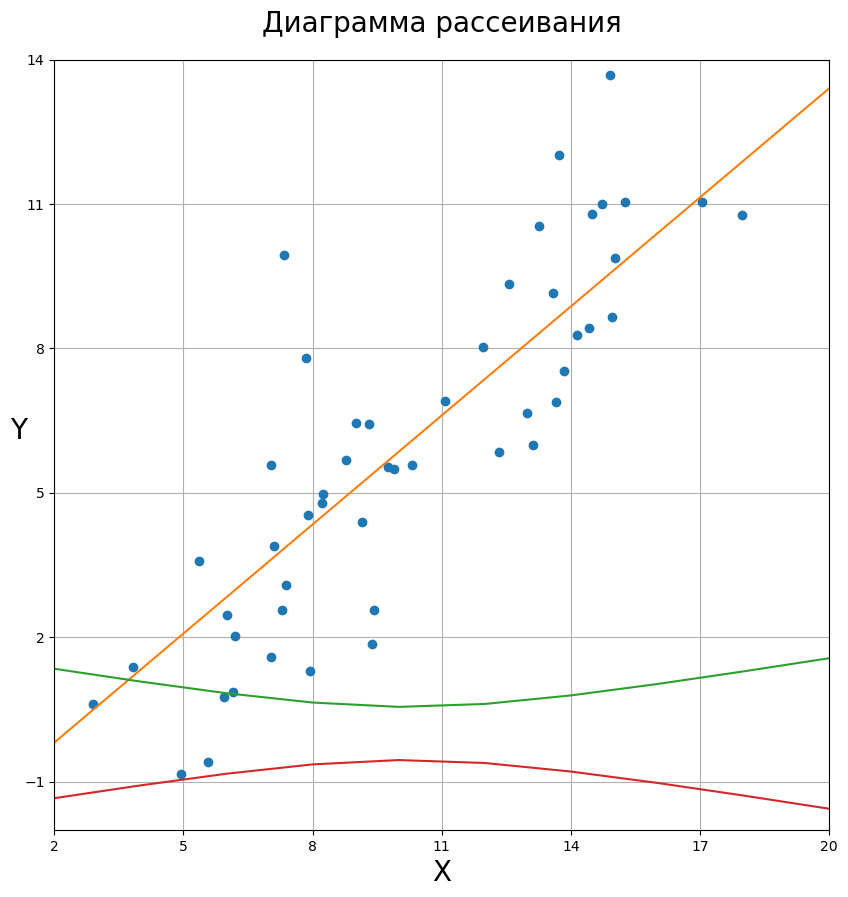

In [36]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

plt.plot(X, Y, "o")

h = 3
x_coords = list(range(math.floor(min(X)), math.ceil(max(X)) + h, h))
y_coords = list(range(math.floor(min(Y)), math.ceil(max(Y)) + h, h))


x_plot = np.linspace(2, 20, 10)
y_plot = 0.755353457172343 * x_plot - 1.69971233230134
plt.plot(x_plot, y_plot)

y_plot = 1.52529940609572 * np.sqrt((0.0979873400356674 * x_plot - 1) ** 2 + 0.130807720560841)
plt.plot(x_plot, y_plot)

y_plot = -(1.52529940609572* np.sqrt((0.0979873400356674 * x_plot - 1) ** 2 + 0.130807720560841))
plt.plot(x_plot, y_plot)

# параметры координатной плоскости
ax.set_xlabel("X", fontdict={"fontsize": 20})
ax.set_ylabel("Y", fontdict={"fontsize": 20}, rotation=0)
plt.title("Диаграмма рассеивания", fontdict={"fontsize": 20}, pad=20)
plt.grid()

ax.set_xlim([2, 18])
ax.set_ylim([-2, 14])

plt.xticks(x_coords)
plt.yticks(y_coords)

plt.show()

**Для негруппированных данных проверить значимость линейной регрессии Y на x (уровень значимости a = 0,05)**

In [37]:
getAInterval(0.831470970298438, alpha, n, s_kv, sx)

[0.6820109387371351, 0.9809310018597408]

Гипотеза $H_0 : a = 0$ отклоняется на уровне значимости $a = 0.05$ , так как доверительный интервал $0.6820109387371351 < a < 0.9809310018597408$ не накрывает нуль с доверительной вероятностью 0,95

<big>$F=  \frac {(n-2)\cdot Q_ {R}}{Q_ {E}} $</big>

In [38]:
f = ((n - 2) * qr) / qe
print(f)

125.11529759789903


*Проверим <big> $ F_{\frac{\alpha}{2} }  (1;n-2)<  f_ {B}  <  F_{\frac{1-\alpha}{2} }  (1;n-2) $ </big>*


In [39]:
print([st.f.ppf(alpha / 2, 1, n - 2), st.f.ppf(1 - alpha / 2, 1, n - 2)])

[0.000992361962603802, 5.354129192845117]


*Гипотеза $H_0 : a = 0$ отклоняется на уровне значимости $a = 0.05$ , так как интервал $f \notin (0.000992361962603802, 5.354129192845117)$. Таким образом, линейная регрессия Y на x статистически значима*